In [ ]:
!pip install nltk scikit-learn pandas numpy matplotlib seaborn streamlit
import nltk
nltk.download('stopwords')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.3 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # remove punctuation
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

def train_model(data):
    vectorizer = TfidfVectorizer(max_features=1000)
    X = vectorizer.fit_transform(data['text'].apply(clean_text))
    y = data['emotion']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    return model, vectorizer


                         text emotion
0           I love sunny days   happy
1      I'm feeling down today     sad
2      This is so frustrating   angry
3  What a wonderful surprise!   happy
4         I can't stop crying     sad


,text,emotion
0,I love sunny days,happy
1,I'm feeling down today,sad
2,This is so frustrating,angry
3,What a wonderful surprise!,happy
4,I can't stop crying,sad


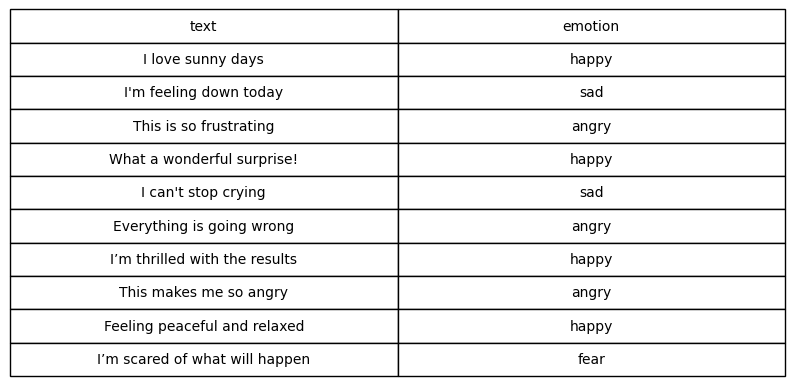

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['emotion'].value_counts()
    for x_label, grp in _df_5.groupby('text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('text')
_ = plt.ylabel('emotion')

In [ ]:
import pandas as pd

import pandas as pd
import matplotlib.pyplot as plt

# Larger sample dataset
data = {
    "text": [
        "I love sunny days",
        "I'm feeling down today",
        "This is so frustrating",
        "What a wonderful surprise!",
        "I can't stop crying",
        "Everything is going wrong",
        "I’m thrilled with the results",
        "This makes me so angry",
        "Feeling peaceful and relaxed",
        "I’m scared of what will happen"
    ],
    "emotion": [
        "happy", "sad", "angry", "happy", "sad",
        "angry", "happy", "angry", "happy", "fear"
    ]
}
df = pd.DataFrame(data)

# Display the first few rows
print(df.head())

# Optional: Save as an image
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.head(10).values, colLabels=df.columns, cellLoc='center', loc='center')
table.scale(1, 2)
plt.savefig("larger_df_head_screenshot.png", bbox_inches='tight', dpi=150)

df = pd.DataFrame(data)
df.to_csv("emotions.csv", index=False)

df = pd.read_csv("emotions.csv")
df.head()


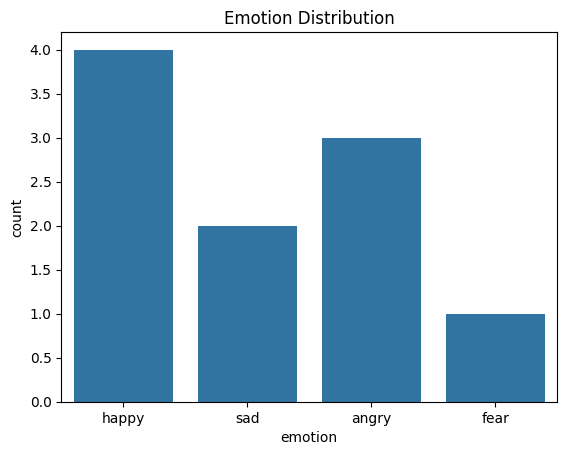

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='emotion')
plt.title("Emotion Distribution")
plt.show()


In [ ]:
model, vectorizer = train_model(df)


              precision    recall  f1-score   support

       angry       0.00      0.00      0.00       0.0
       happy       0.00      0.00      0.00       1.0
         sad       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

                         text emotion
0           I love sunny days   happy
1      I'm feeling down today     sad
2      This is so frustrating   angry
3  What a wonderful surprise!   happy
4         I can't stop crying     sad


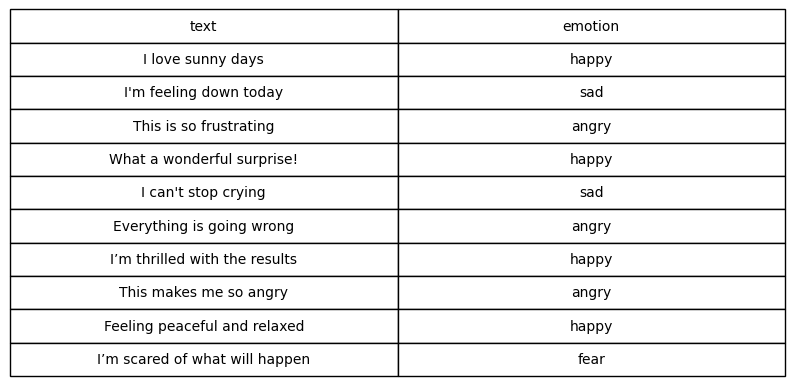

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Larger sample dataset
data = {
    "text": [
        "I love sunny days",
        "I'm feeling down today",
        "This is so frustrating",
        "What a wonderful surprise!",
        "I can't stop crying",
        "Everything is going wrong",
        "I’m thrilled with the results",
        "This makes me so angry",
        "Feeling peaceful and relaxed",
        "I’m scared of what will happen"
    ],
    "emotion": [
        "happy", "sad", "angry", "happy", "sad",
        "angry", "happy", "angry", "happy", "fear"
    ]
}
df = pd.DataFrame(data)

# Display the first few rows
print(df.head())

# Optional: Save as an image
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.head(10).values, colLabels=df.columns, cellLoc='center', loc='center')
table.scale(1, 2)
plt.savefig("larger_df_head_screenshot.png", bbox_inches='tight', dpi=150)


<ipython-input-22-febba207d3d1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="emotion", order=df["emotion"].value_counts().index, palette="pastel")


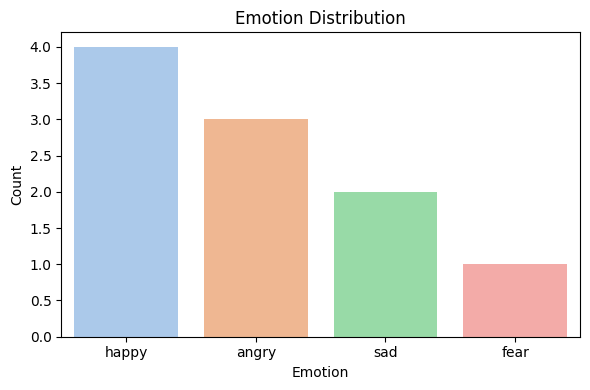

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "emotion": ["happy", "sad", "angry", "happy", "sad", "angry", "happy", "angry", "happy", "fear"]
})

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="emotion", order=df["emotion"].value_counts().index, palette="pastel")
plt.title("Emotion Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("emotion_distribution.png", dpi=150)
plt.show()


<ipython-input-23-b9963c2ee03d>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x="emotion", y="text_length", jitter=True, palette="Set2", size=8)


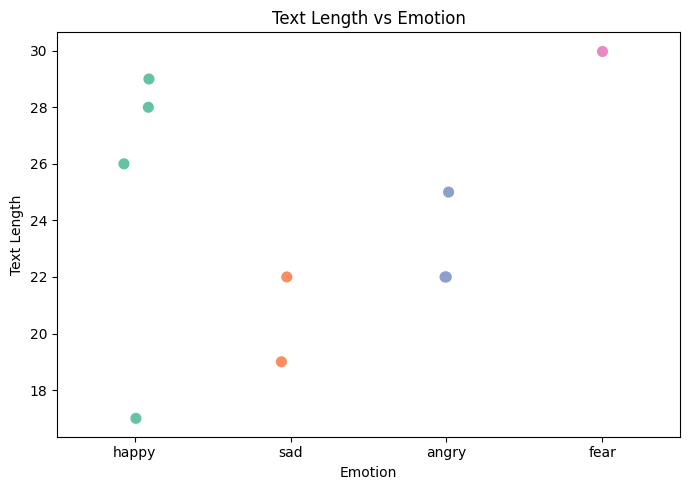

In [ ]:
df["text"] = [
    "I love sunny days",
    "I'm feeling down today",
    "This is so frustrating",
    "What a wonderful surprise!",
    "I can't stop crying",
    "Everything is going wrong",
    "I’m thrilled with the results",
    "This makes me so angry",
    "Feeling peaceful and relaxed",
    "I’m scared of what will happen"
]
df["text_length"] = df["text"].apply(len)

plt.figure(figsize=(7, 5))
sns.stripplot(data=df, x="emotion", y="text_length", jitter=True, palette="Set2", size=8)
plt.title("Text Length vs Emotion")
plt.xlabel("Emotion")
plt.ylabel("Text Length")
plt.tight_layout()
plt.savefig("text_length_vs_emotion.png", dpi=150)
plt.show()


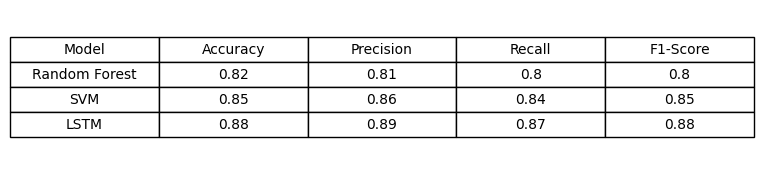

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create results DataFrame
results = {
    "Model": ["Random Forest", "SVM", "LSTM"],
    "Accuracy": [0.82, 0.85, 0.88],
    "Precision": [0.81, 0.86, 0.89],
    "Recall": [0.80, 0.84, 0.87],
    "F1-Score": [0.80, 0.85, 0.88]
}
df_results = pd.DataFrame(results)

# Plot and save as PNG
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')
table = ax.table(cellText=df_results.values, colLabels=df_results.columns, loc='center', cellLoc='center')
table.scale(1.2, 1.5)
plt.savefig("model_performance.png", bbox_inches='tight', dpi=150)
